In [9]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [10]:
from src.data.generate import generate_european_vanilla

In [11]:
n_paths = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000, 10000, 20000, 40000, 100000]
datasets_n_paths = {}

for n_path in tqdm(n_paths, desc="MC path sizes"):
    print(
        f"making synthetic data for a dataset of option prices with {n_path} of monte-carlo paths"
    )
    start = time.perf_counter()
    dataset = generate_european_vanilla(
        Option_types=["call", "put"],  # call, put
        S_values=list(np.linspace(80, 120, 8 + 1)),  # 80, 85, 90, ..., 120
        K_values=[100],  # 100
        T_values=[
            0.08,
            0.25,
            0.5,
            1.0,
            2.0,
            5.0,
        ],  # 1 month, 3 months, 6 months, 1 year, 2 years, 5 years
        r_values=[0.01, 0.025, 0.05, 0.075, 0.1],  # 1%, 2.5%, 5%, 7.5%, 10%
        sigma_values=[0.1, 0.2, 0.4, 0.6, 0.8],
        q_values=[0.0, 0.01, 0.02, 0.03, 0.04, 0.05],  # 0%, 1%, 2%, 3%, 4%, 5%
        n_paths= n_path
    )
    elapsed = time.perf_counter() - start
    datasets_n_paths[n_path] = dataset
    print(
        f"- done with making the dataset, it took {elapsed:.2f} seconds! ({n_path} of monte-carlo paths)"
    )

MC path sizes:   0%|          | 0/13 [00:00<?, ?it/s]

making synthetic data for a dataset of option prices with 10 of monte-carlo paths


MC path sizes:   8%|▊         | 1/13 [00:12<02:32, 12.68s/it]

- done with making the dataset, it took 12.69 seconds! (10 of monte-carlo paths)
making synthetic data for a dataset of option prices with 20 of monte-carlo paths


MC path sizes:  15%|█▌        | 2/13 [00:25<02:23, 13.03s/it]

- done with making the dataset, it took 13.27 seconds! (20 of monte-carlo paths)
making synthetic data for a dataset of option prices with 40 of monte-carlo paths


MC path sizes:  23%|██▎       | 3/13 [00:39<02:10, 13.05s/it]

- done with making the dataset, it took 13.08 seconds! (40 of monte-carlo paths)
making synthetic data for a dataset of option prices with 100 of monte-carlo paths


MC path sizes:  31%|███       | 4/13 [00:52<01:58, 13.12s/it]

- done with making the dataset, it took 13.23 seconds! (100 of monte-carlo paths)
making synthetic data for a dataset of option prices with 200 of monte-carlo paths


MC path sizes:  38%|███▊      | 5/13 [01:04<01:43, 12.92s/it]

- done with making the dataset, it took 12.55 seconds! (200 of monte-carlo paths)
making synthetic data for a dataset of option prices with 400 of monte-carlo paths


MC path sizes:  46%|████▌     | 6/13 [01:18<01:32, 13.20s/it]

- done with making the dataset, it took 13.74 seconds! (400 of monte-carlo paths)
making synthetic data for a dataset of option prices with 1000 of monte-carlo paths


MC path sizes:  54%|█████▍    | 7/13 [01:31<01:19, 13.26s/it]

- done with making the dataset, it took 13.38 seconds! (1000 of monte-carlo paths)
making synthetic data for a dataset of option prices with 2000 of monte-carlo paths


MC path sizes:  62%|██████▏   | 8/13 [01:45<01:06, 13.21s/it]

- done with making the dataset, it took 13.12 seconds! (2000 of monte-carlo paths)
making synthetic data for a dataset of option prices with 4000 of monte-carlo paths


MC path sizes:  69%|██████▉   | 9/13 [01:58<00:53, 13.32s/it]

- done with making the dataset, it took 13.54 seconds! (4000 of monte-carlo paths)
making synthetic data for a dataset of option prices with 10000 of monte-carlo paths


MC path sizes:  77%|███████▋  | 10/13 [02:11<00:39, 13.23s/it]

- done with making the dataset, it took 13.03 seconds! (10000 of monte-carlo paths)
making synthetic data for a dataset of option prices with 20000 of monte-carlo paths


MC path sizes:  85%|████████▍ | 11/13 [02:24<00:26, 13.17s/it]

- done with making the dataset, it took 13.04 seconds! (20000 of monte-carlo paths)
making synthetic data for a dataset of option prices with 40000 of monte-carlo paths


MC path sizes:  92%|█████████▏| 12/13 [02:38<00:13, 13.28s/it]

- done with making the dataset, it took 13.51 seconds! (40000 of monte-carlo paths)
making synthetic data for a dataset of option prices with 100000 of monte-carlo paths


MC path sizes: 100%|██████████| 13/13 [02:55<00:00, 13.53s/it]

- done with making the dataset, it took 17.69 seconds! (100000 of monte-carlo paths)


In [ ]:
Error_Values = {}
Error_Stats = {}
for n_path in n_paths:
    dataset = datasets_n_paths[n_path]
    error = dataset["bs_price"] - dataset["mc_price"]
    abs_error = abs(error)
    
    mean_error = error.mean() 
    std_error = error.std()
    
    mean_abs_error = abs_error.mean()
    std_abs_error = abs_error.std()
    
    Error_Values[n_path] = error
    Error_Stats[n_path] = {
        "number of paths": n_path,
        "one over sqrt of number of paths": (1 / np.sqrt(n_path)),
        "mean of error": mean_error,
        "standard deviation of error": std_error,
        "mean of absolute error": mean_abs_error,
        "standard deviation of absolute error": std_abs_error,
    }

In [42]:
Error_Stats

{10: {'number of paths': 10,
  'sqrt of number of paths': np.float64(3.1623),
  'mean of error': np.float64(0.1412122309767276),
  'standard deviation of error': 16.405637074523007,
  'mean of absolute error': np.float64(6.5134565469700325),
  'standard deviation of absolute error': 15.057793157062251},
 20: {'number of paths': 20,
  'sqrt of number of paths': np.float64(4.4721),
  'mean of error': np.float64(-0.10320725224124694),
  'standard deviation of error': 18.49905987611165,
  'mean of absolute error': np.float64(5.050601489955909),
  'standard deviation of absolute error': 17.796508606562934},
 40: {'number of paths': 40,
  'sqrt of number of paths': np.float64(6.3246),
  'mean of error': np.float64(0.004407895580562567),
  'standard deviation of error': 9.920234873454577,
  'mean of absolute error': np.float64(3.59691767593321),
  'standard deviation of absolute error': 9.245131904296514},
 100: {'number of paths': 100,
  'sqrt of number of paths': np.float64(10.0),
  'mean o

In [43]:
Error_Stats = pd.DataFrame(Error_Stats).transpose().reset_index().drop(columns="index")

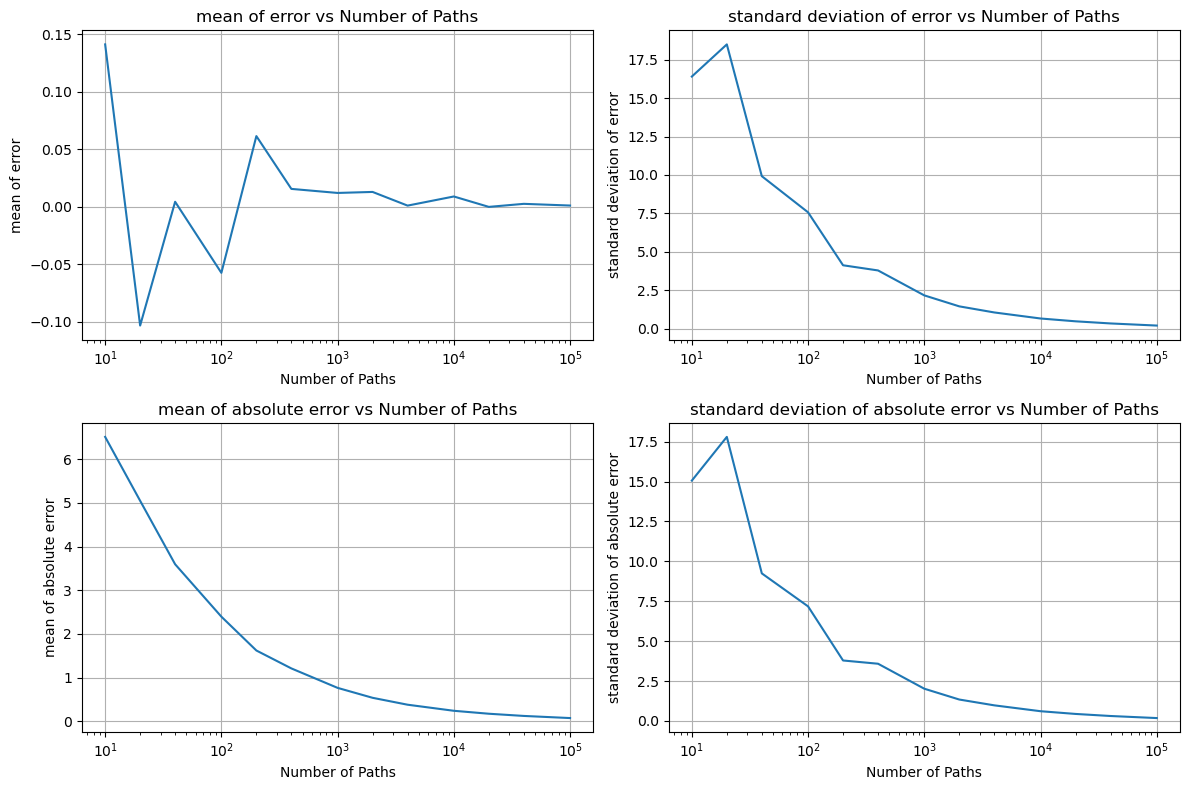

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
metrics = [
    "mean of error",
    "standard deviation of error",
    "mean of absolute error",
    "standard deviation of absolute error",
]
axes = axes.flatten()

# Plot each metric in its subplot
for ax, metric in zip(axes, metrics):
    ax.plot(Error_Stats["number of paths"], Error_Stats[metric])
    ax.set_xscale("log")
    ax.set_title(f"{metric} vs Number of Paths")
    ax.set_xlabel("Number of Paths")
    ax.set_ylabel(metric)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Plot each metric and 1/sqrt(n) in its subplot
for ax, metric in zip(axes, metrics):
    ax.plot(Error_Stats["number of paths"], Error_Stats[metric], label=metric)  # default (orange)
    ax.plot(Error_Stats["number of paths"], 1/Error_Stats["sqrt_"], color="red", label="1/√n")
    ax.set_xscale("log")
    ax.set_title(f"{metric} vs Number of Paths")
    ax.set_xlabel("Number of Paths")
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()